# CODE TO CLASSIFY TRAFFIC SIGNS USING LE-NET ARCHITECTURE IN KERAS

# STEP 0: PROBLEM STATEMENT

- In this case study, you have been provided with images of traffic signs and the goal is to train a Deep Network to classify them
- The dataset contains 43 different classes of images. 
- Classes are as listed below: 

    - ( 0, b'Speed limit (20km/h)') ( 1, b'Speed limit (30km/h)')
    - ( 2, b'Speed limit (50km/h)') ( 3, b'Speed limit (60km/h)')
    - ( 4, b'Speed limit (70km/h)') ( 5, b'Speed limit (80km/h)')
    - ( 6, b'End of speed limit (80km/h)') ( 7, b'Speed limit (100km/h)')
    - ( 8, b'Speed limit (120km/h)') ( 9, b'No passing')
    - (10, b'No passing for vehicles over 3.5 metric tons')
    - (11, b'Right-of-way at the next intersection') (12, b'Priority road')
    - (13, b'Yield') (14, b'Stop') (15, b'No vehicles')
    - (16, b'Vehicles over 3.5 metric tons prohibited') (17, b'No entry')
    - (18, b'General caution') (19, b'Dangerous curve to the left')
    - (20, b'Dangerous curve to the right') (21, b'Double curve')
    - (22, b'Bumpy road') (23, b'Slippery road')
    - (24, b'Road narrows on the right') (25, b'Road work')
    - (26, b'Traffic signals') (27, b'Pedestrians') (28, b'Children crossing')
    - (29, b'Bicycles crossing') (30, b'Beware of ice/snow')
    - (31, b'Wild animals crossing')
    - (32, b'End of all speed and passing limits') (33, b'Turn right ahead')
    - (34, b'Turn left ahead') (35, b'Ahead only') (36, b'Go straight or right')
    - (37, b'Go straight or left') (38, b'Keep right') (39, b'Keep left')
    - (40, b'Roundabout mandatory') (41, b'End of no passing')
    - (42, b'End of no passing by vehicles over 3.5 metric tons')

- The network used is called Le-Net that was presented by Yann LeCun
http://yann.lecun.com/exdb/publis/pdf/lecun-01a.pdf


Citation

J. Stallkamp, M. Schlipsing, J. Salmen, and C. Igel. The German Traffic Sign Recognition Benchmark: A multi-class classification competition. In Proceedings of the IEEE International Joint Conference on Neural Networks, pages 1453–1460. 2011. 

@inproceedings{Stallkamp-IJCNN-2011,
    author = {Johannes Stallkamp and Marc Schlipsing and Jan Salmen and Christian Igel},
    booktitle = {IEEE International Joint Conference on Neural Networks},
    title = {The {G}erman {T}raffic {S}ign {R}ecognition {B}enchmark: A multi-class classification competition},
    year = {2011},
    pages = {1453--1460}
}



# STEP 1: IMPORT LIBRARIES AND DATASET

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

C:\Users\Glavian\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# The pickle module implements binary protocols for serializing and de-serializing a Python object structure.
with open("J:\\New courses\\ML 8 real world projects resources\\P74-Project-1\\Project 5\\traffic-signs-data\\train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open("J:\\New courses\\ML 8 real world projects resources\\P74-Project-1\\Project 5\\traffic-signs-data\\valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("J:\\New courses\\ML 8 real world projects resources\\P74-Project-1\\Project 5\\traffic-signs-data\\test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [3]:
X_train, y_train = train['features'], train['labels']
X_validation, y_validation = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [4]:
X_train.shape

(34799, 32, 32, 3)

In [5]:
y_train.shape

(34799,)

In [6]:
X_validation.shape

(4410, 32, 32, 3)

In [7]:
y_validation.shape

(4410,)

In [8]:
X_test.shape

(12630, 32, 32, 3)

In [9]:
y_test.shape

(12630,)

# STEP 2: IMAGE EXPLORATION

25

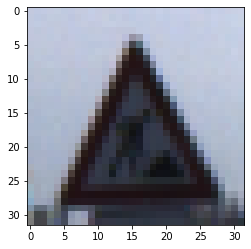

In [10]:
i = 4000
plt.imshow(X_test[i])
y_test[i]

# STEP 3: DATA PREPARATION

In [11]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

In [12]:
X_train_gray = np.sum(X_train/3, axis = 3, keepdims = True)
X_test_gray = np.sum(X_test/3, axis = 3, keepdims = True)
X_validation_gray = np.sum(X_validation/3, axis = 3, keepdims = True)

In [13]:
X_validation_gray.shape

(4410, 32, 32, 1)

In [14]:
X_train_gray_norm = (X_train_gray - 128)/128
X_validation_gray_norm = (X_validation_gray - 128)/128
X_test_gray_norm = (X_test_gray - 128)/128

In [15]:
X_train_gray_norm

array([[[[-0.30729167],
         [-0.25      ],
         [-0.06510417],
         ...,
         [ 0.61979167],
         [ 0.6484375 ],
         [ 0.1953125 ]],

        [[-0.33854167],
         [-0.25520833],
         [-0.11979167],
         ...,
         [-0.12760417],
         [-0.1171875 ],
         [-0.26302083]],

        [[-0.34635417],
         [-0.30208333],
         [-0.26822917],
         ...,
         [-0.6328125 ],
         [-0.64583333],
         [-0.66927083]],

        ...,

        [[-0.72395833],
         [-0.73177083],
         [-0.74479167],
         ...,
         [-0.796875  ],
         [-0.796875  ],
         [-0.78385417]],

        [[-0.7265625 ],
         [-0.72916667],
         [-0.734375  ],
         ...,
         [-0.80989583],
         [-0.79947917],
         [-0.78125   ]],

        [[-0.71875   ],
         [-0.72916667],
         [-0.72916667],
         ...,
         [-0.8203125 ],
         [-0.8046875 ],
         [-0.78125   ]]],


       [[[-0.109375  ],


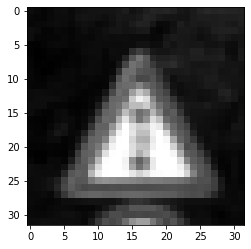

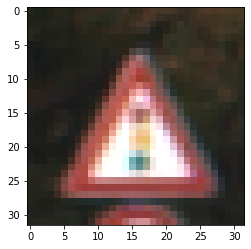

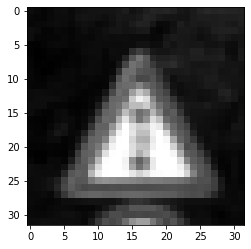

In [16]:
i = 810
plt.imshow(X_test_gray[i].squeeze(), cmap = 'gray')
plt.figure()
plt.imshow(X_test[i])
plt.figure()
plt.imshow(X_test_gray_norm[i].squeeze(), cmap ='gray')

# STEP 4: MODEL TRAINING

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard

In [18]:
cnn_model = Sequential()
cnn_model.add(Conv2D(filters = 6, kernel_size= (5,5), activation='relu', input_shape = (32,32,1)))
cnn_model.add(AveragePooling2D())

cnn_model.add(Conv2D(filters = 16, kernel_size= (5,5), activation='relu'))
cnn_model.add(AveragePooling2D())

cnn_model.add(Flatten())

cnn_model.add(Dense(units = 120, activation='relu'))

cnn_model.add(Dense(units = 84, activation='relu'))

cnn_model.add(Dense(units = 43, activation='softmax'))

In [19]:
cnn_model.compile(loss = 'sparse_categorical_crossentropy', optimizer = Adam(learning_rate = 0.001), metrics = ['Accuracy'])

In [20]:
X_validation.shape

(4410, 32, 32, 3)

In [21]:
history = cnn_model.fit(X_train_gray_norm,
             y_train,
             batch_size=500,
             epochs = 5,
             verbose = 1,
             validation_data= (X_validation_gray_norm,y_validation))

Epoch 1/5
70/70 [==============================] - 3s 40ms/step - loss: 3.2342 - Accuracy: 0.1653 - val_loss: 2.8207 - val_Accuracy: 0.2605
Epoch 2/5
70/70 [==============================] - 3s 38ms/step - loss: 1.6936 - Accuracy: 0.5309 - val_loss: 1.3535 - val_Accuracy: 0.6134
Epoch 3/5
70/70 [==============================] - 3s 38ms/step - loss: 0.9206 - Accuracy: 0.7378 - val_loss: 0.9473 - val_Accuracy: 0.7200
Epoch 4/5
70/70 [==============================] - 3s 38ms/step - loss: 0.6501 - Accuracy: 0.8196 - val_loss: 0.7880 - val_Accuracy: 0.7651
Epoch 5/5
70/70 [==============================] - 3s 38ms/step - loss: 0.5184 - Accuracy: 0.8596 - val_loss: 0.7515 - val_Accuracy: 0.7766


# STEP 5: MODEL EVALUATION

In [22]:
score = cnn_model.evaluate(X_test_gray_norm, y_test)
print('Test Accuracy: {}'.format(score[1]))

395/395 [==============================] - 1s 2ms/step - loss: 0.9940 - Accuracy: 0.7556
Test Accuracy: 0.7555819749832153


In [23]:
history.history.keys()

dict_keys(['loss', 'Accuracy', 'val_loss', 'val_Accuracy'])

In [24]:
Accuracy = history.history['Accuracy']
val_Accuracy = history.history['val_Accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

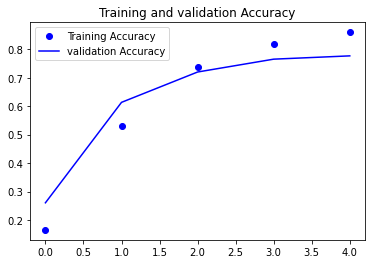

In [25]:
epochs = range(len(Accuracy))

plt.plot(epochs, Accuracy, 'bo', label = 'Training Accuracy')
plt.plot(epochs, val_Accuracy, 'b', label = 'validation Accuracy')
plt.title('Training and validation Accuracy')
plt.legend()

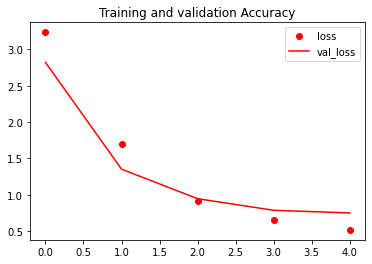

In [26]:
plt.plot(epochs, loss, 'ro', label = 'loss')
plt.plot(epochs, val_loss, 'r', label = 'val_loss')
plt.title('Training and validation Accuracy')
plt.legend()

In [27]:
predicted_classes = cnn_model.predict(X_test_gray_norm).round()
y_true = y_test

395/395 [==============================] - 1s 2ms/step


In [34]:
from sklearn.metrics import confusion_matrix
y_test_arg=y_test
Y_pred = np.argmax(cnn_model.predict(X_test_gray_norm),axis=1)
cm = confusion_matrix(y_test_arg, Y_pred)

395/395 [==============================] - 1s 2ms/step


<AxesSubplot:>

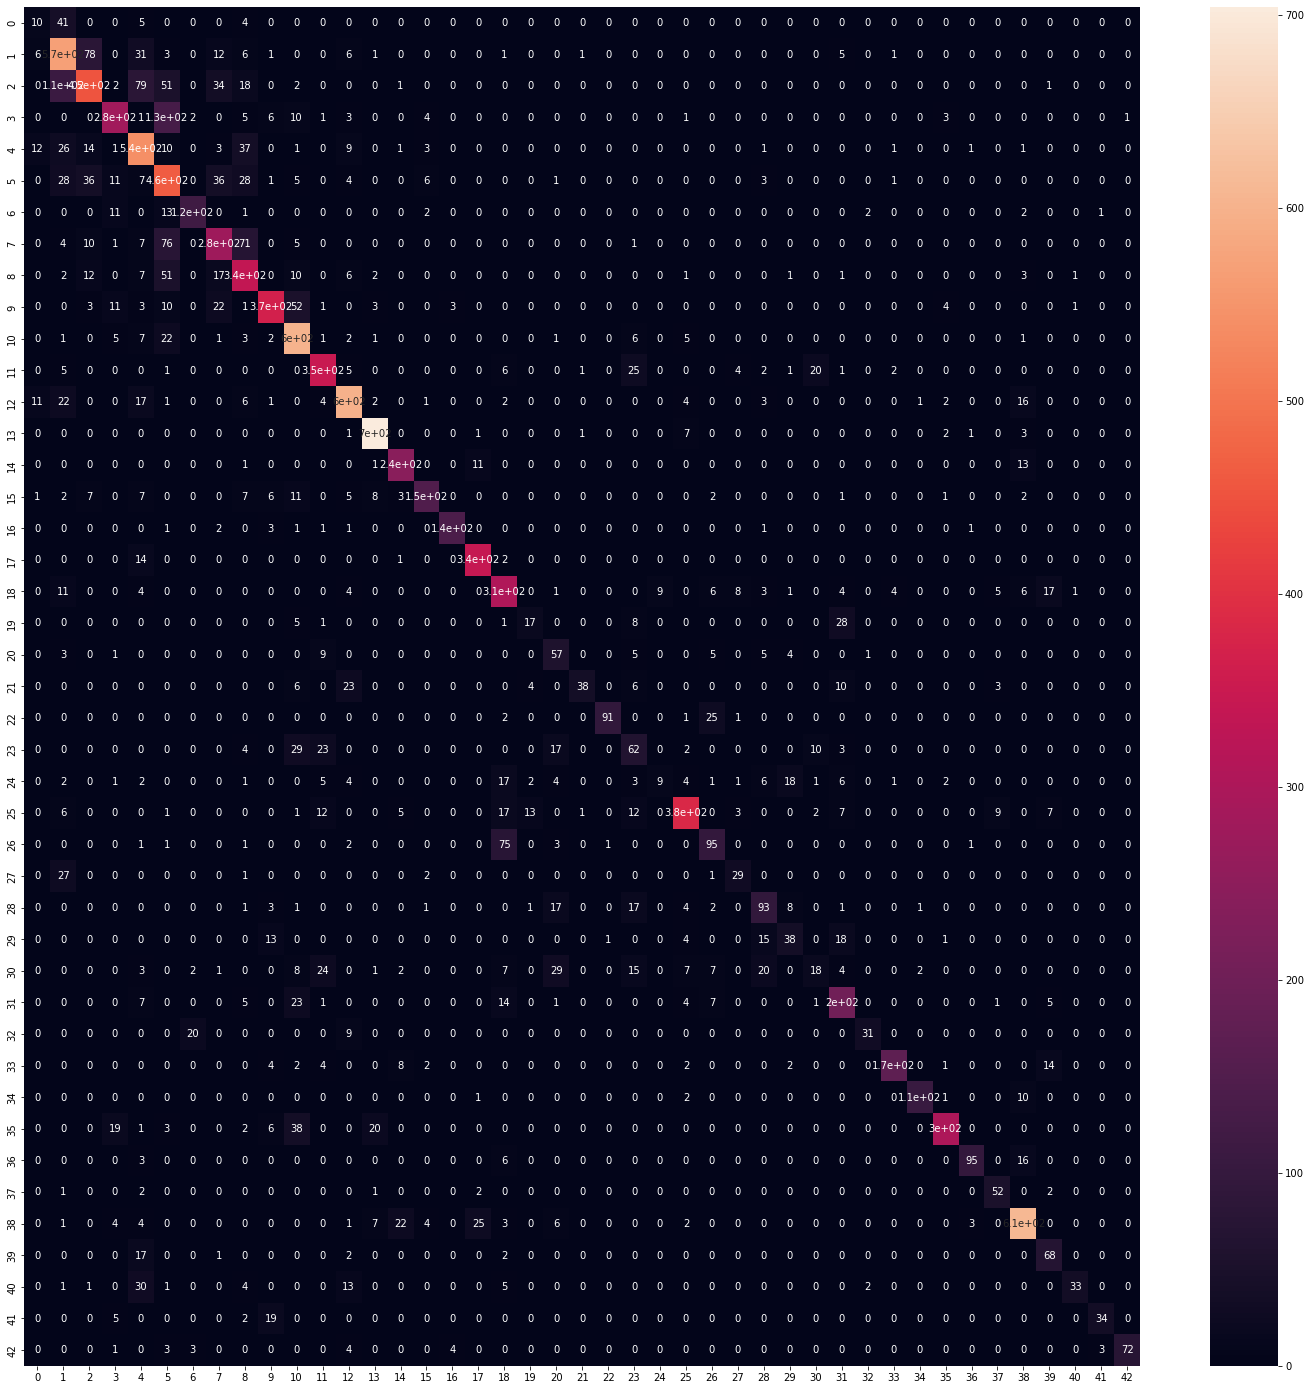

In [36]:
plt.figure(figsize = (25,25))
sns.heatmap(cm, annot = True)

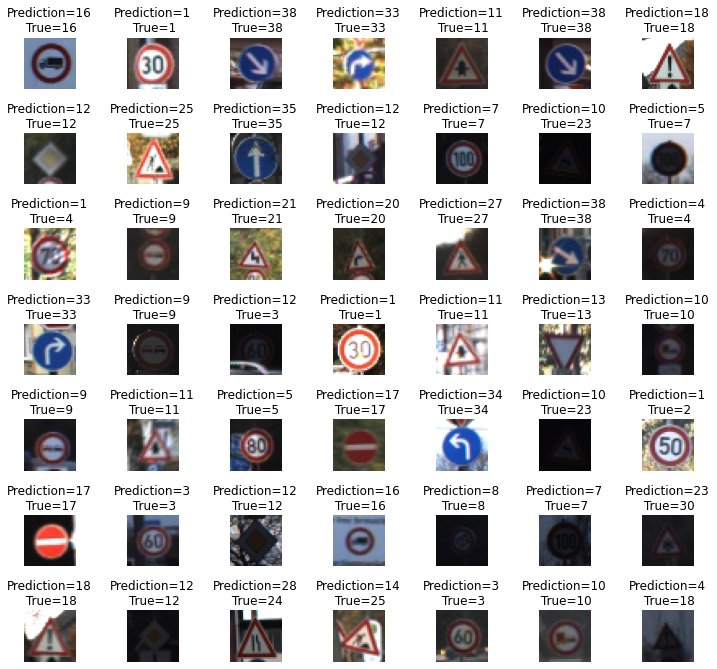

In [50]:
L = 7
W = 7

fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction={}\n True={}'.format(Y_pred[i], y_true[i]))
    axes[i].axis('off')
plt.subplots_adjust(wspace = 1)    